<!--NAVIGATION-->
< [Customizing Matplotlib: Configurations and Stylesheets](04.11-Settings-and-Stylesheets.ipynb) | [Contents](Index.ipynb) | [Geographic Data with Basemap](04.13-Geographic-Data-With-Basemap.ipynb) >

# Three-Dimensional Plotting in Matplotlib

In [1]:
from mpl_toolkits import mplot3d

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


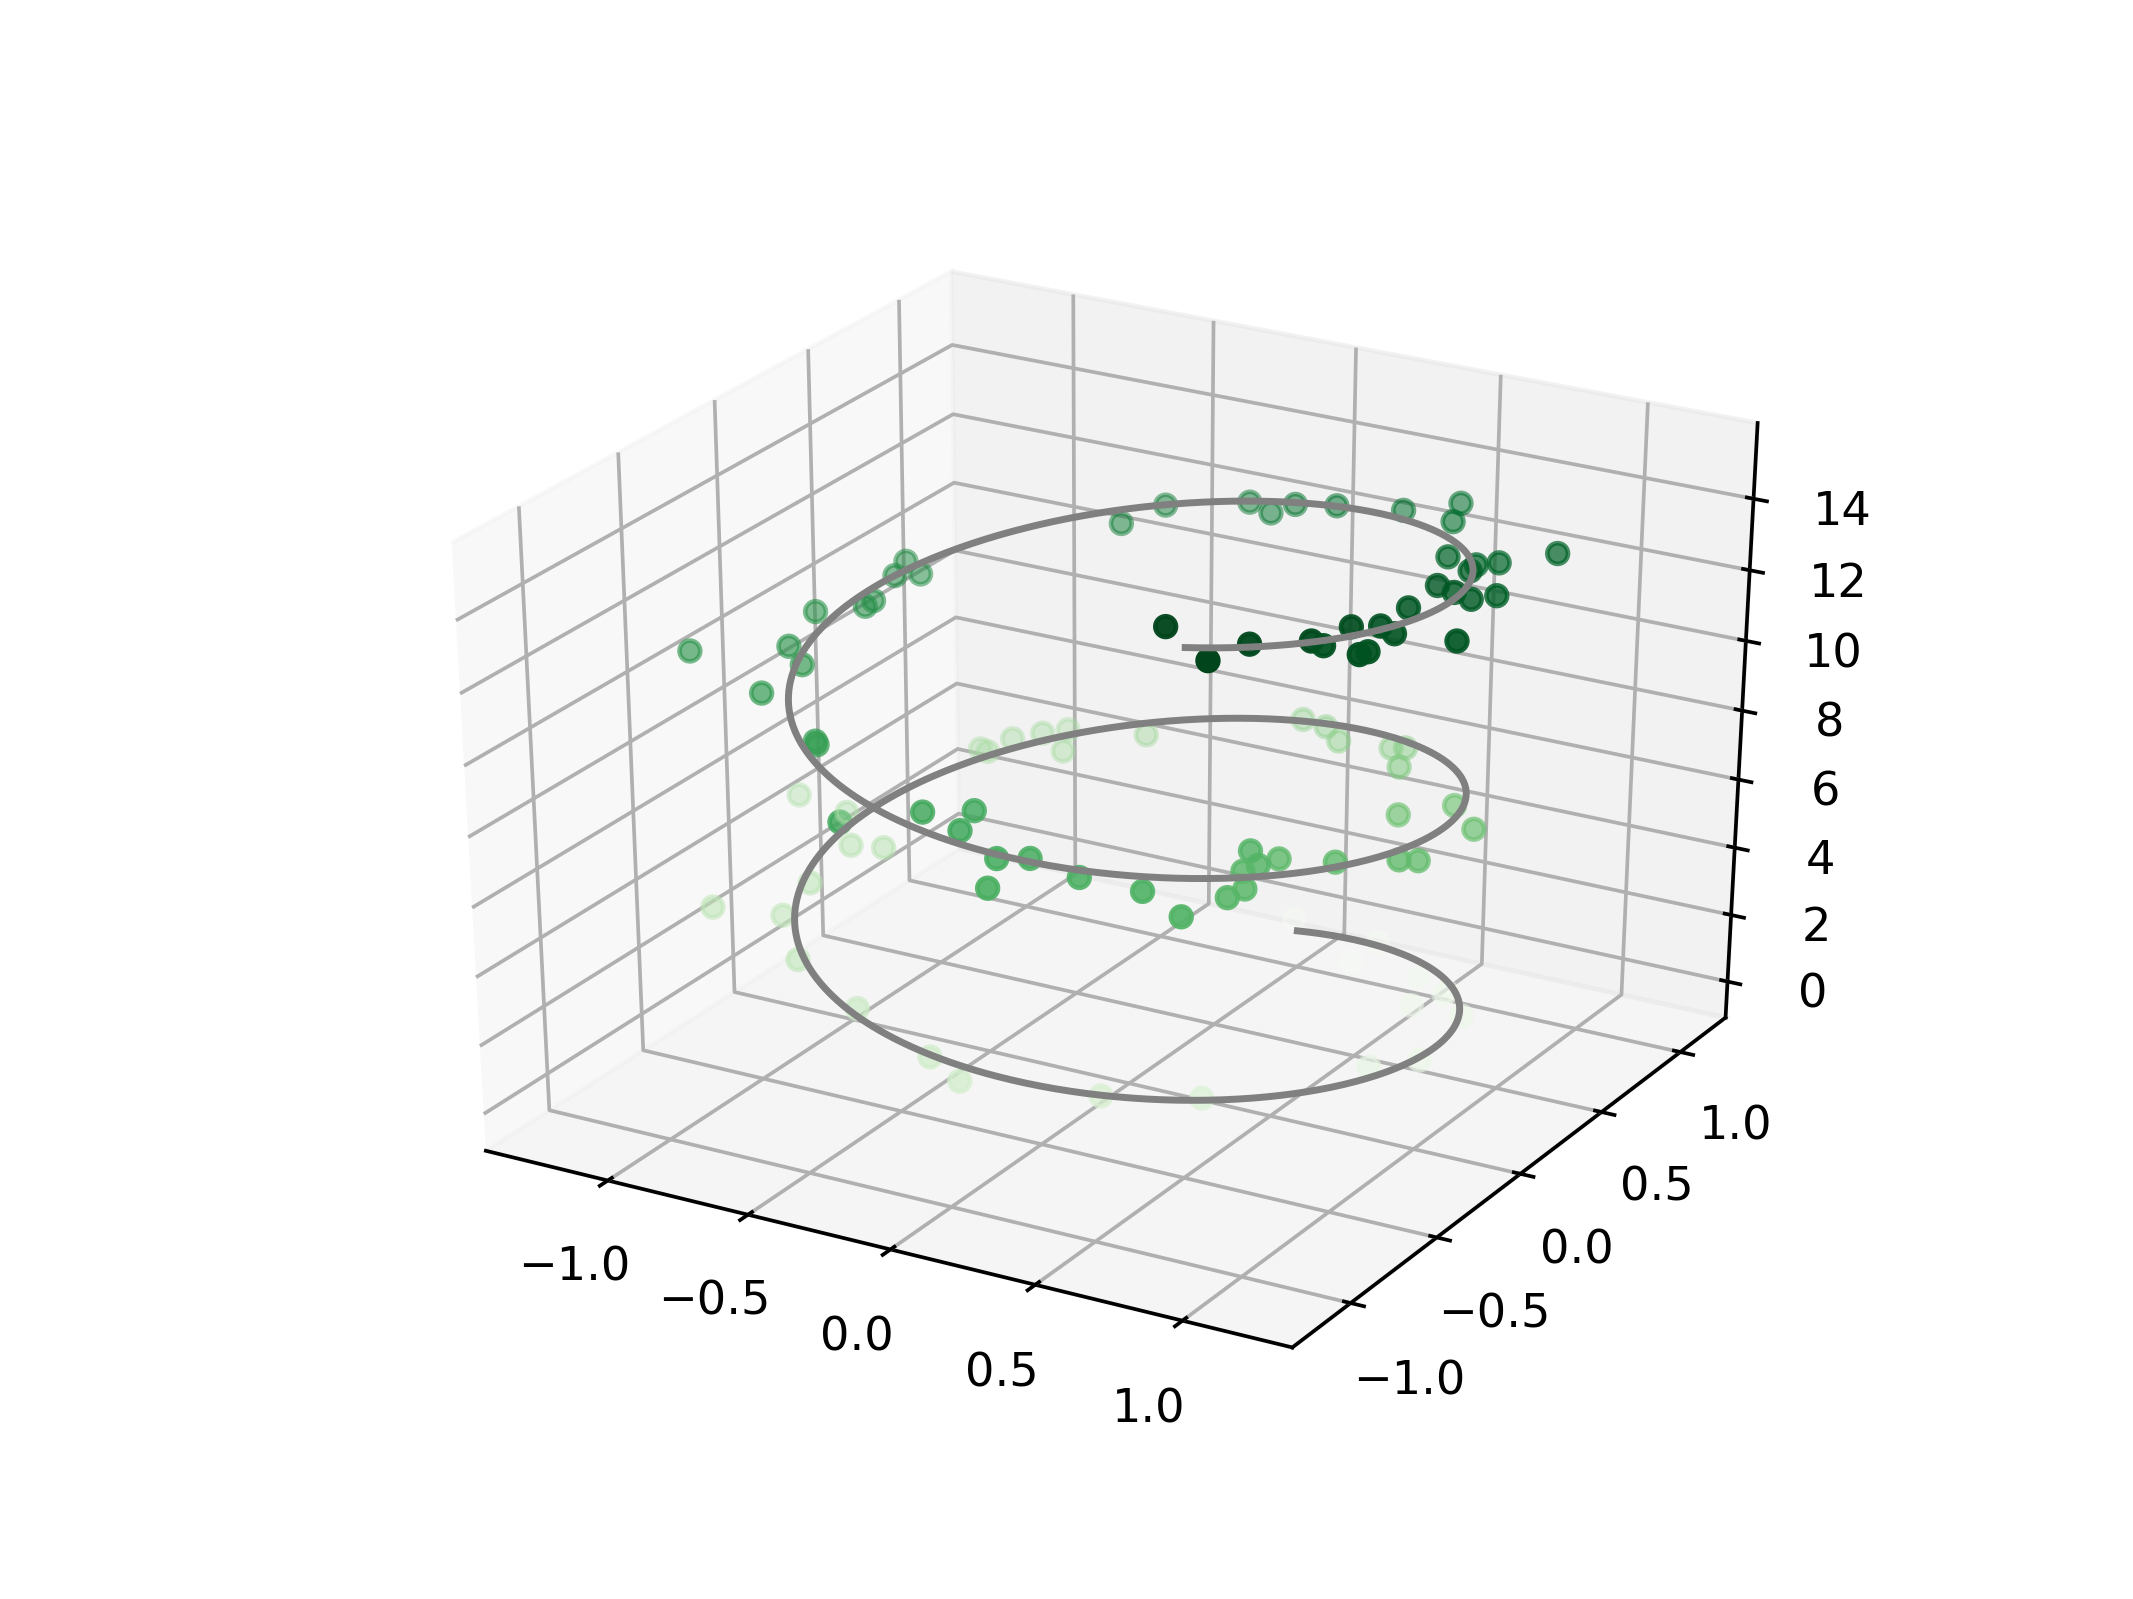

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')

## Three-dimensional Points and Lines

``ax.plot3D`` and ``ax.scatter3D`` 

<IPython.core.display.Javascript object>


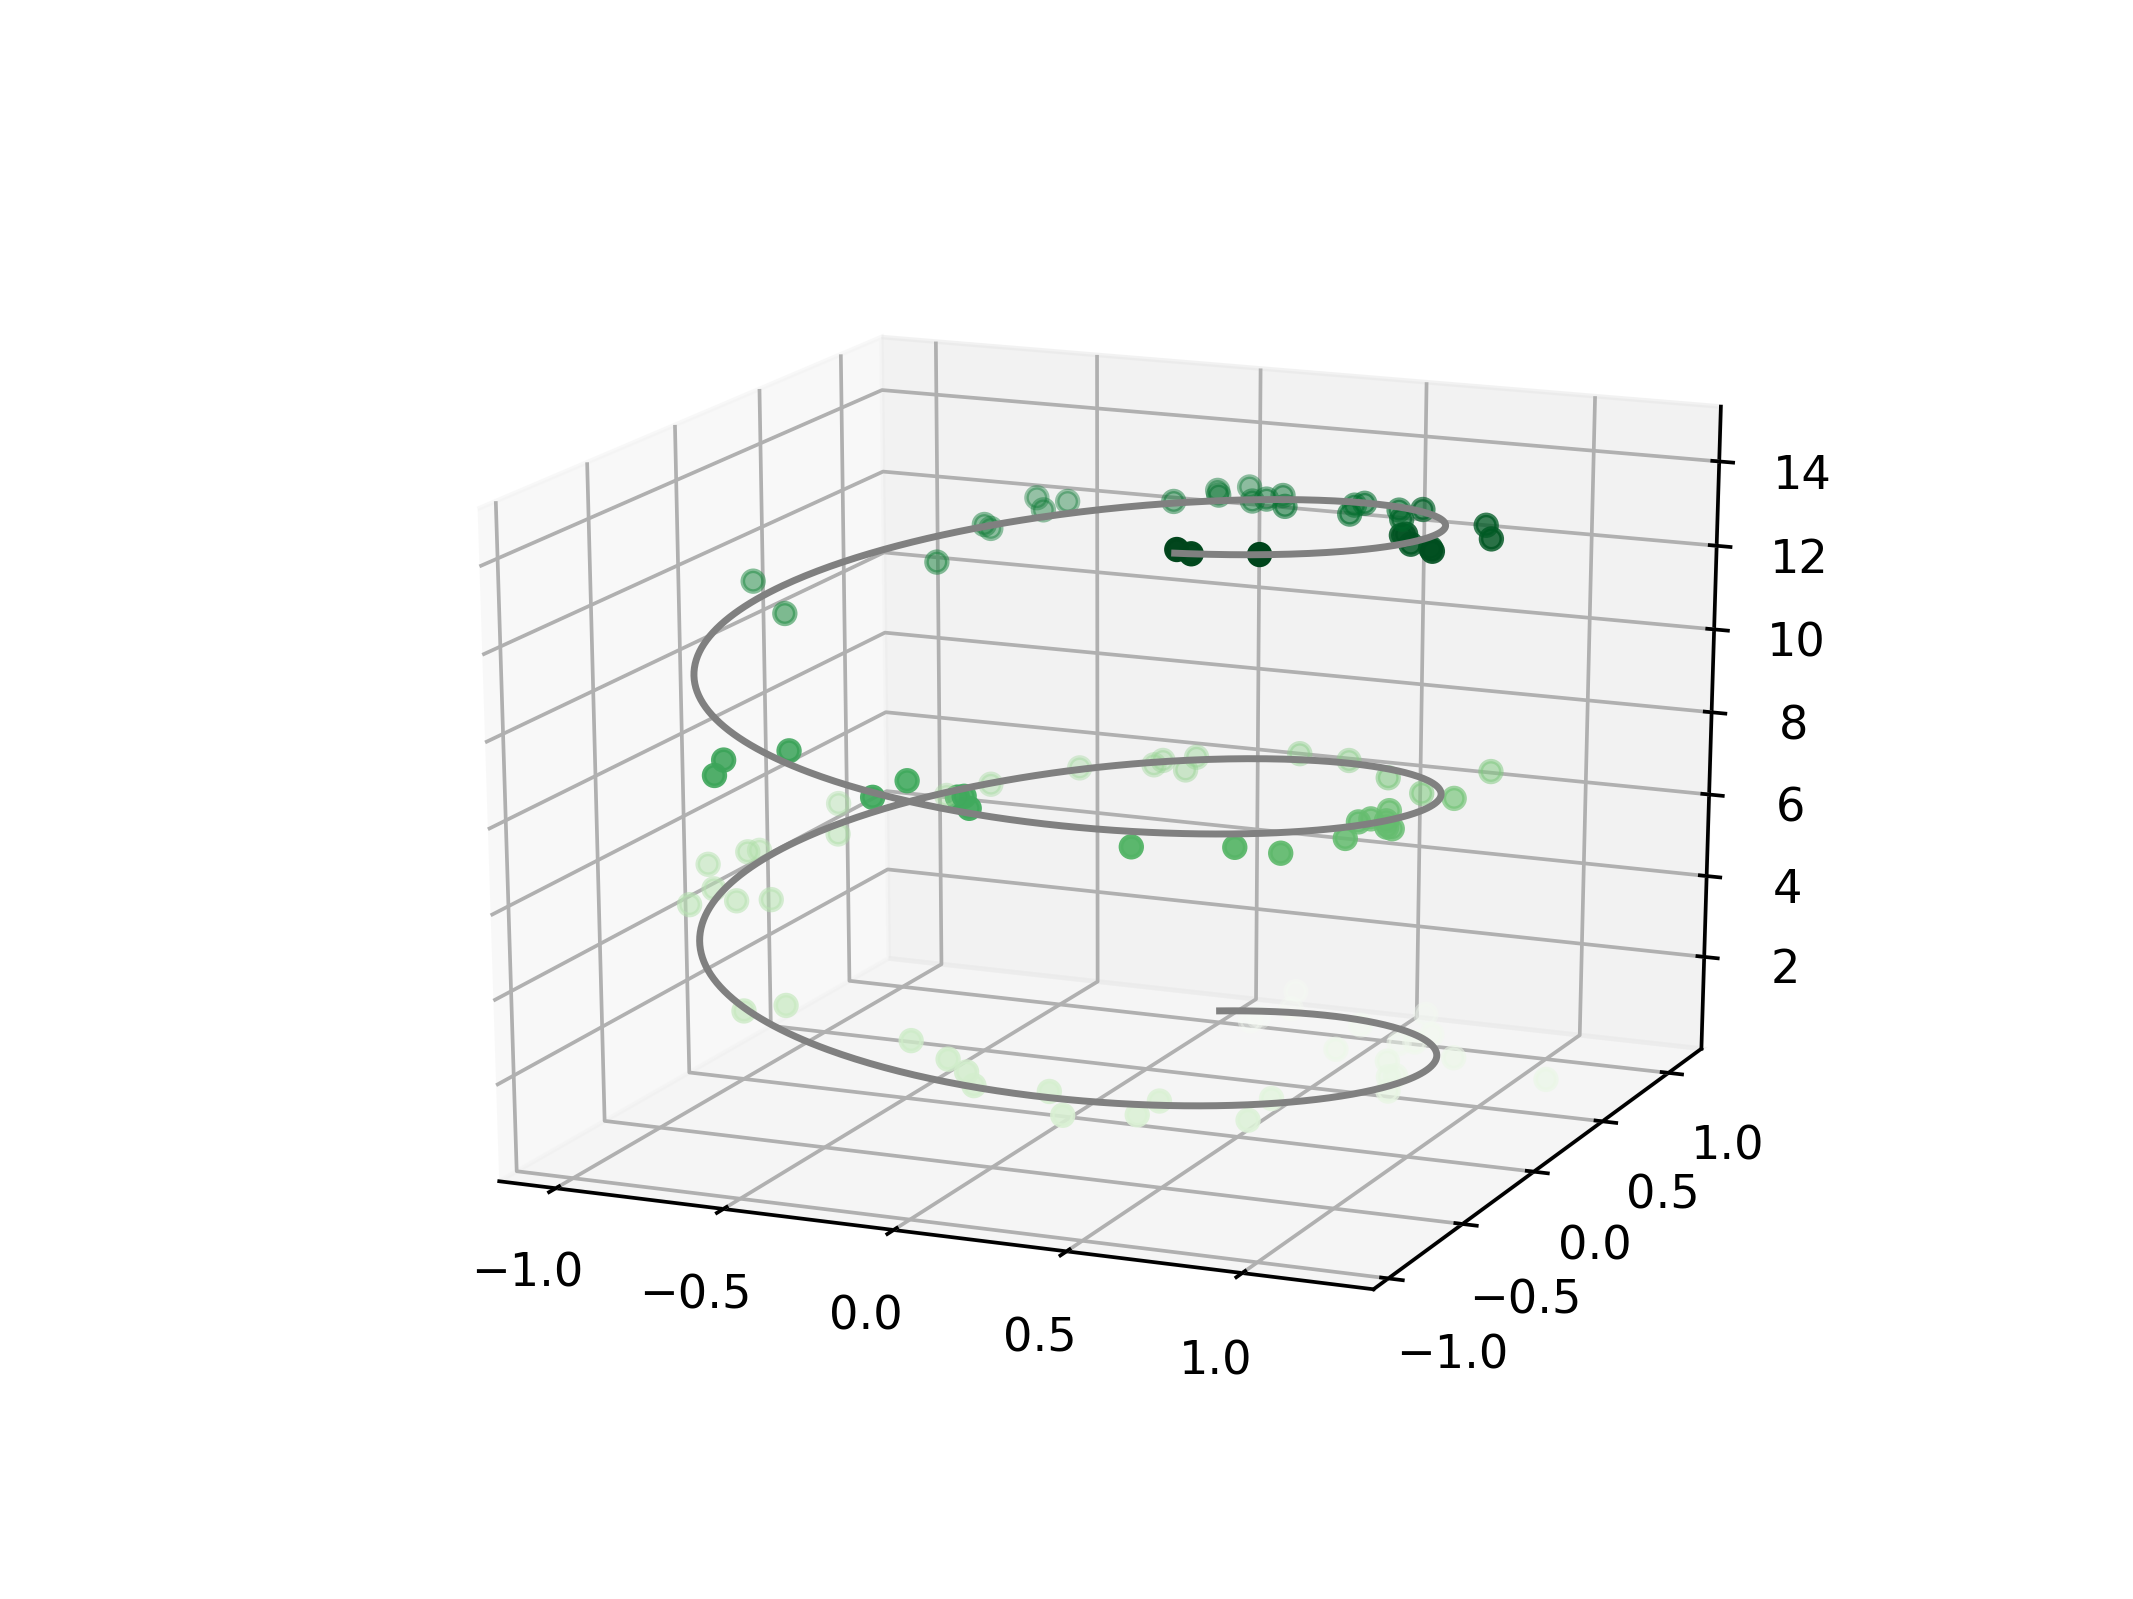

In [5]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

## Three-dimensional Contour Plots

Analogous to the 2D contour plots: in ``mplot3d`` use ``ax.contour3D`` 

In [6]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

<IPython.core.display.Javascript object>


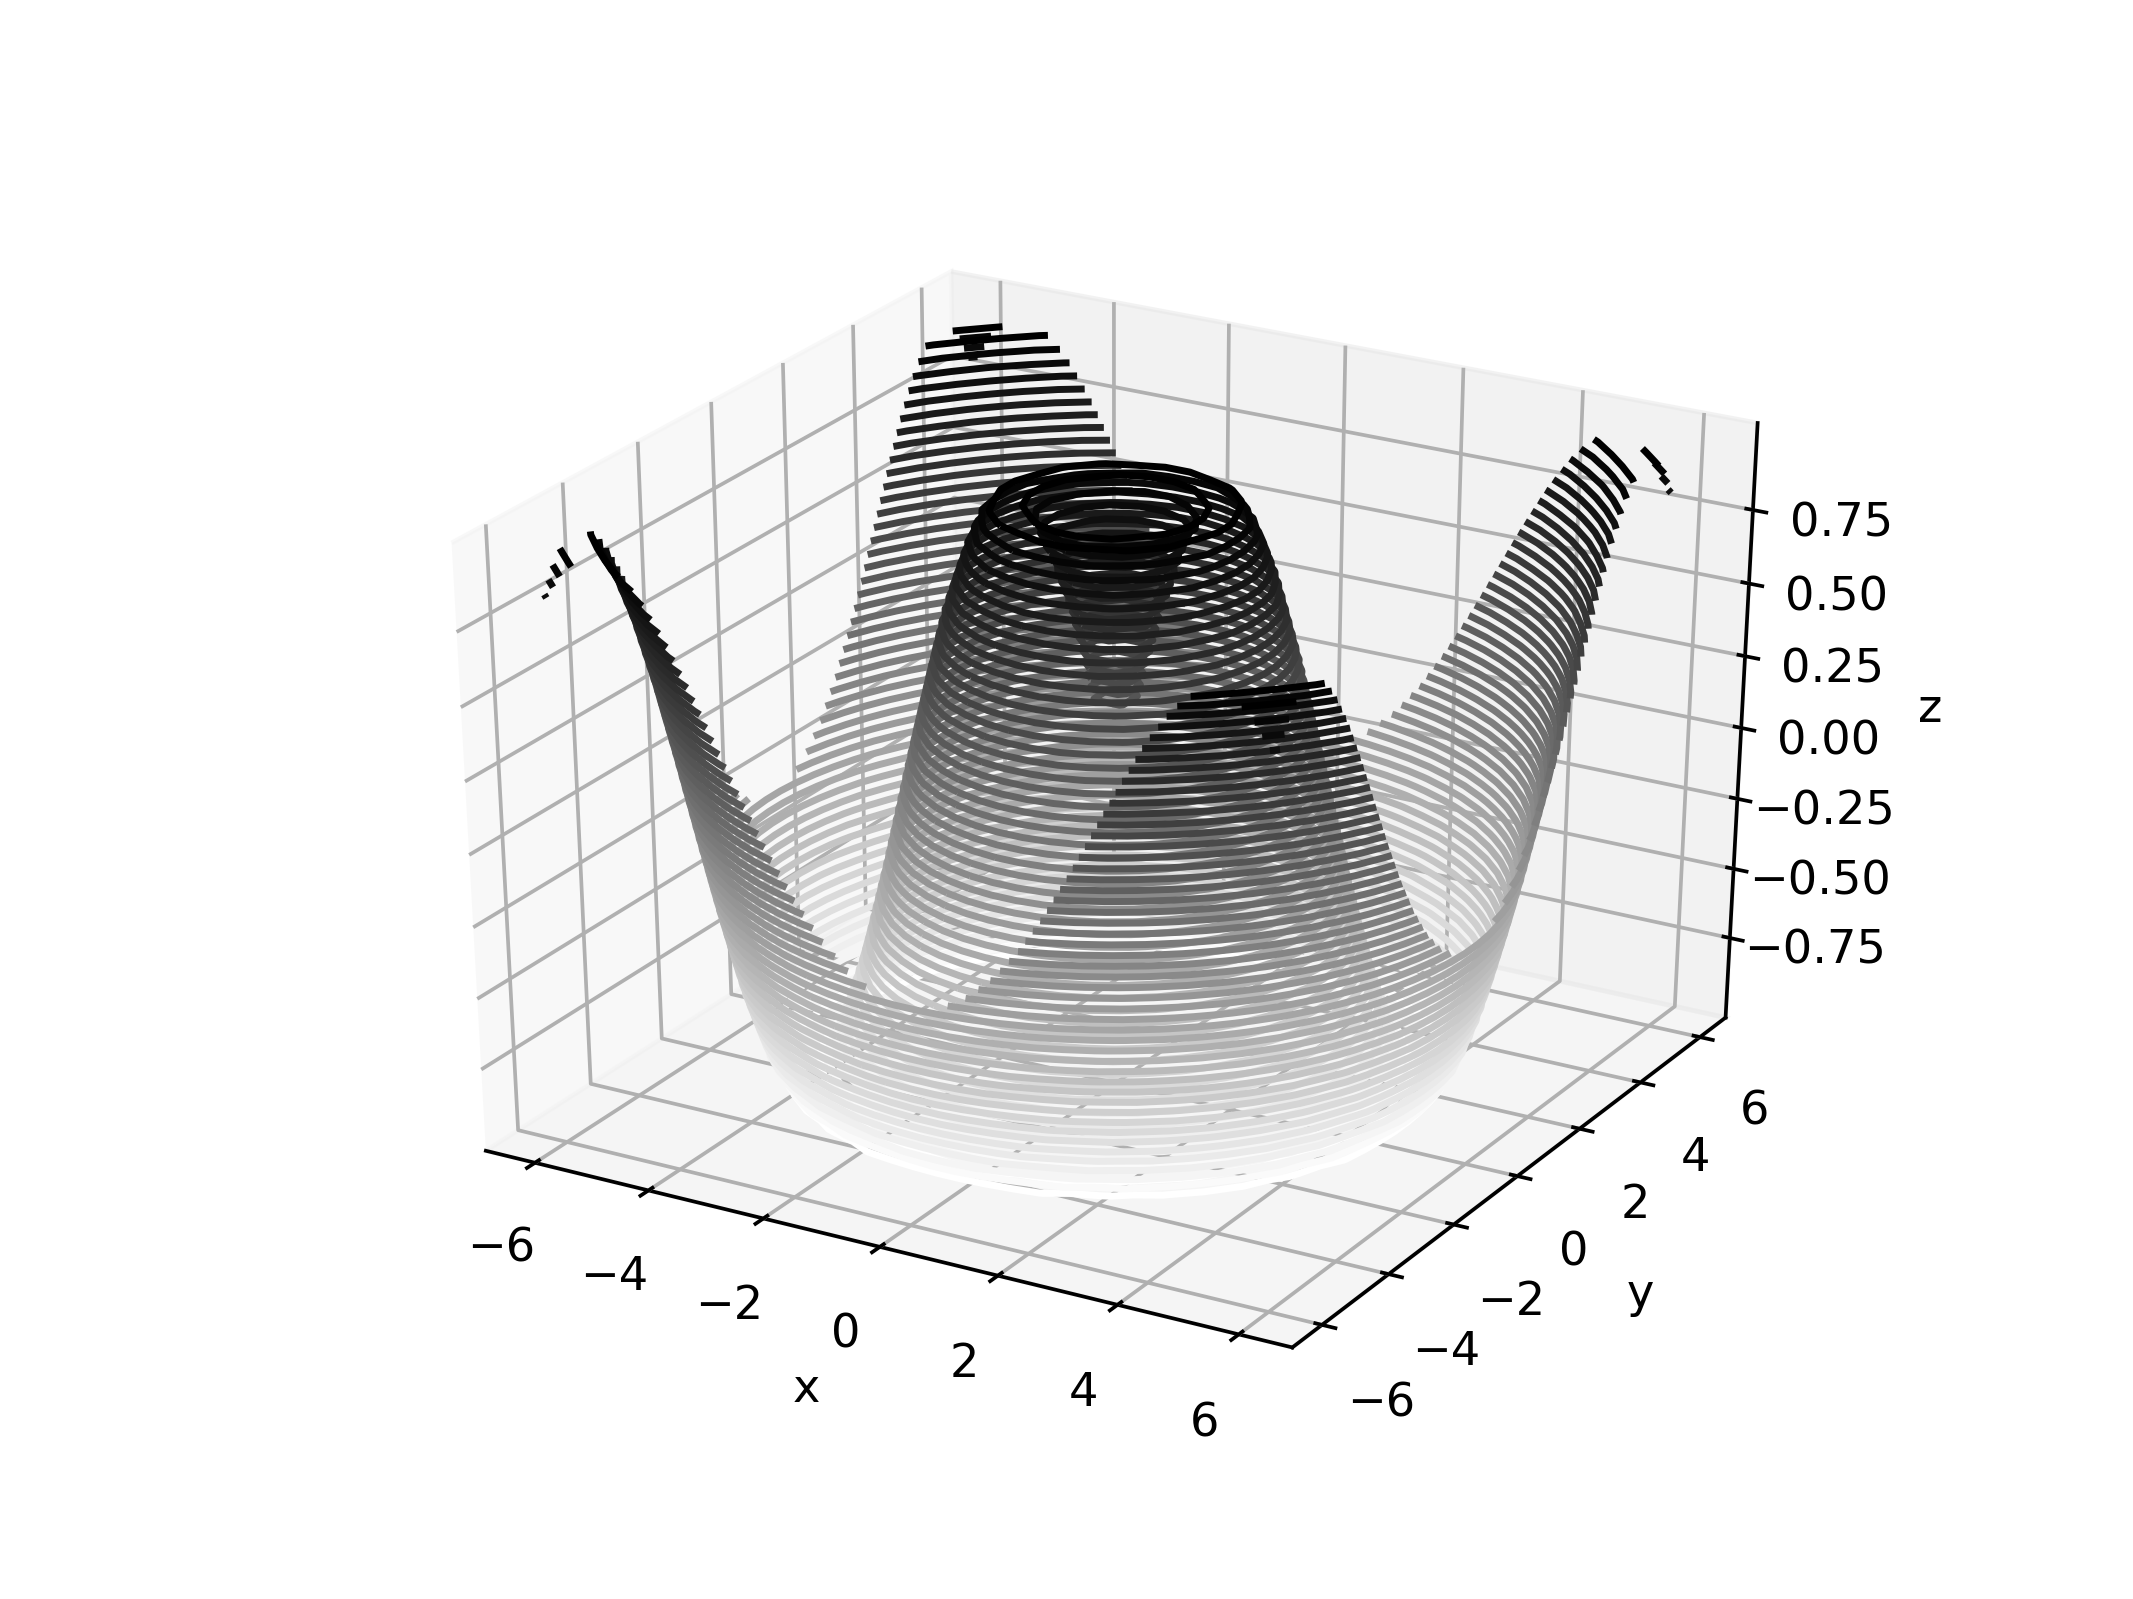

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Sometimes the default viewing angle is not optimal, in which case we can use the ``view_init`` method to set the elevation and azimuthal angles. In the following example, we'll use an elevation of 60 degrees (that is, 60 degrees above the x-y plane) and an azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis):

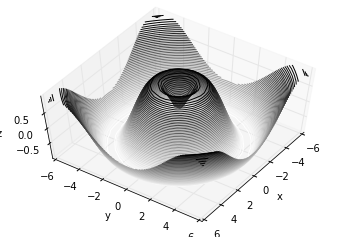

In [7]:
ax.view_init(60, 35)
fig

## Wireframes and Surface Plots

Two other types of three-dimensional plots that work on gridded data are wireframes and surface plots.
These take a grid of values and project it onto the specified three-dimensional surface, and can make the resulting three-dimensional forms quite easy to visualize.
Here's an example of using a wireframe:

<IPython.core.display.Javascript object>


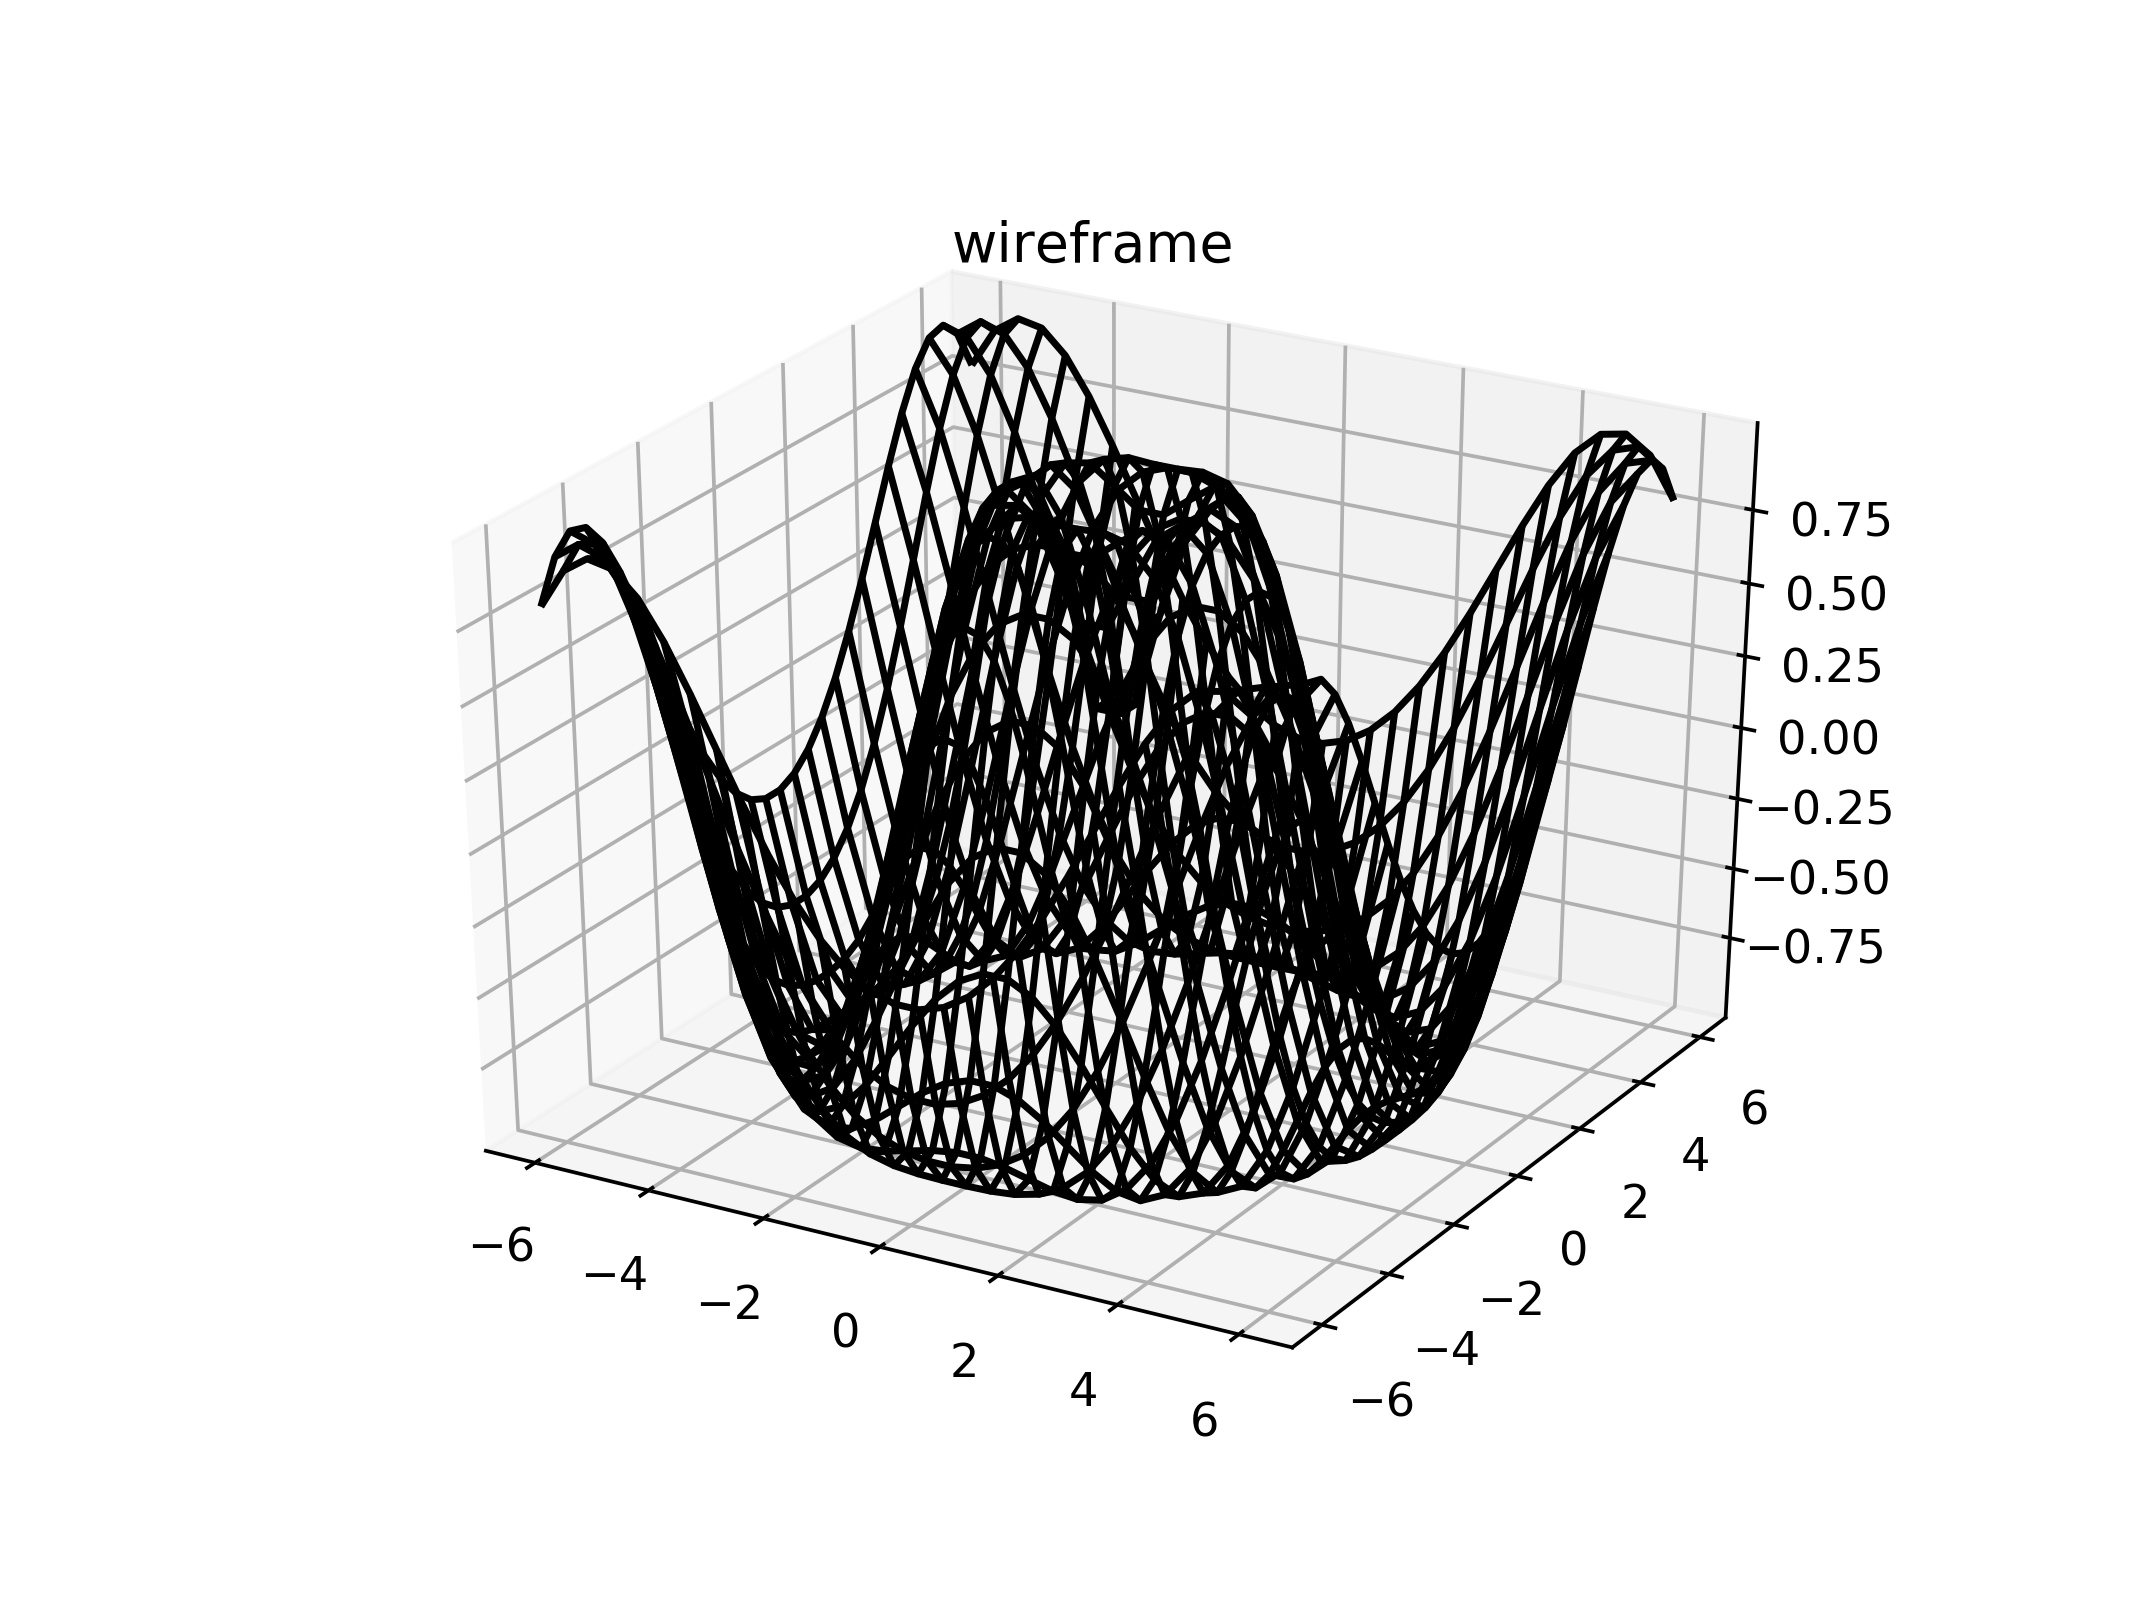

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

A surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon.
Adding a colormap to the filled polygons can aid perception of the topology of the surface being visualized:

<IPython.core.display.Javascript object>


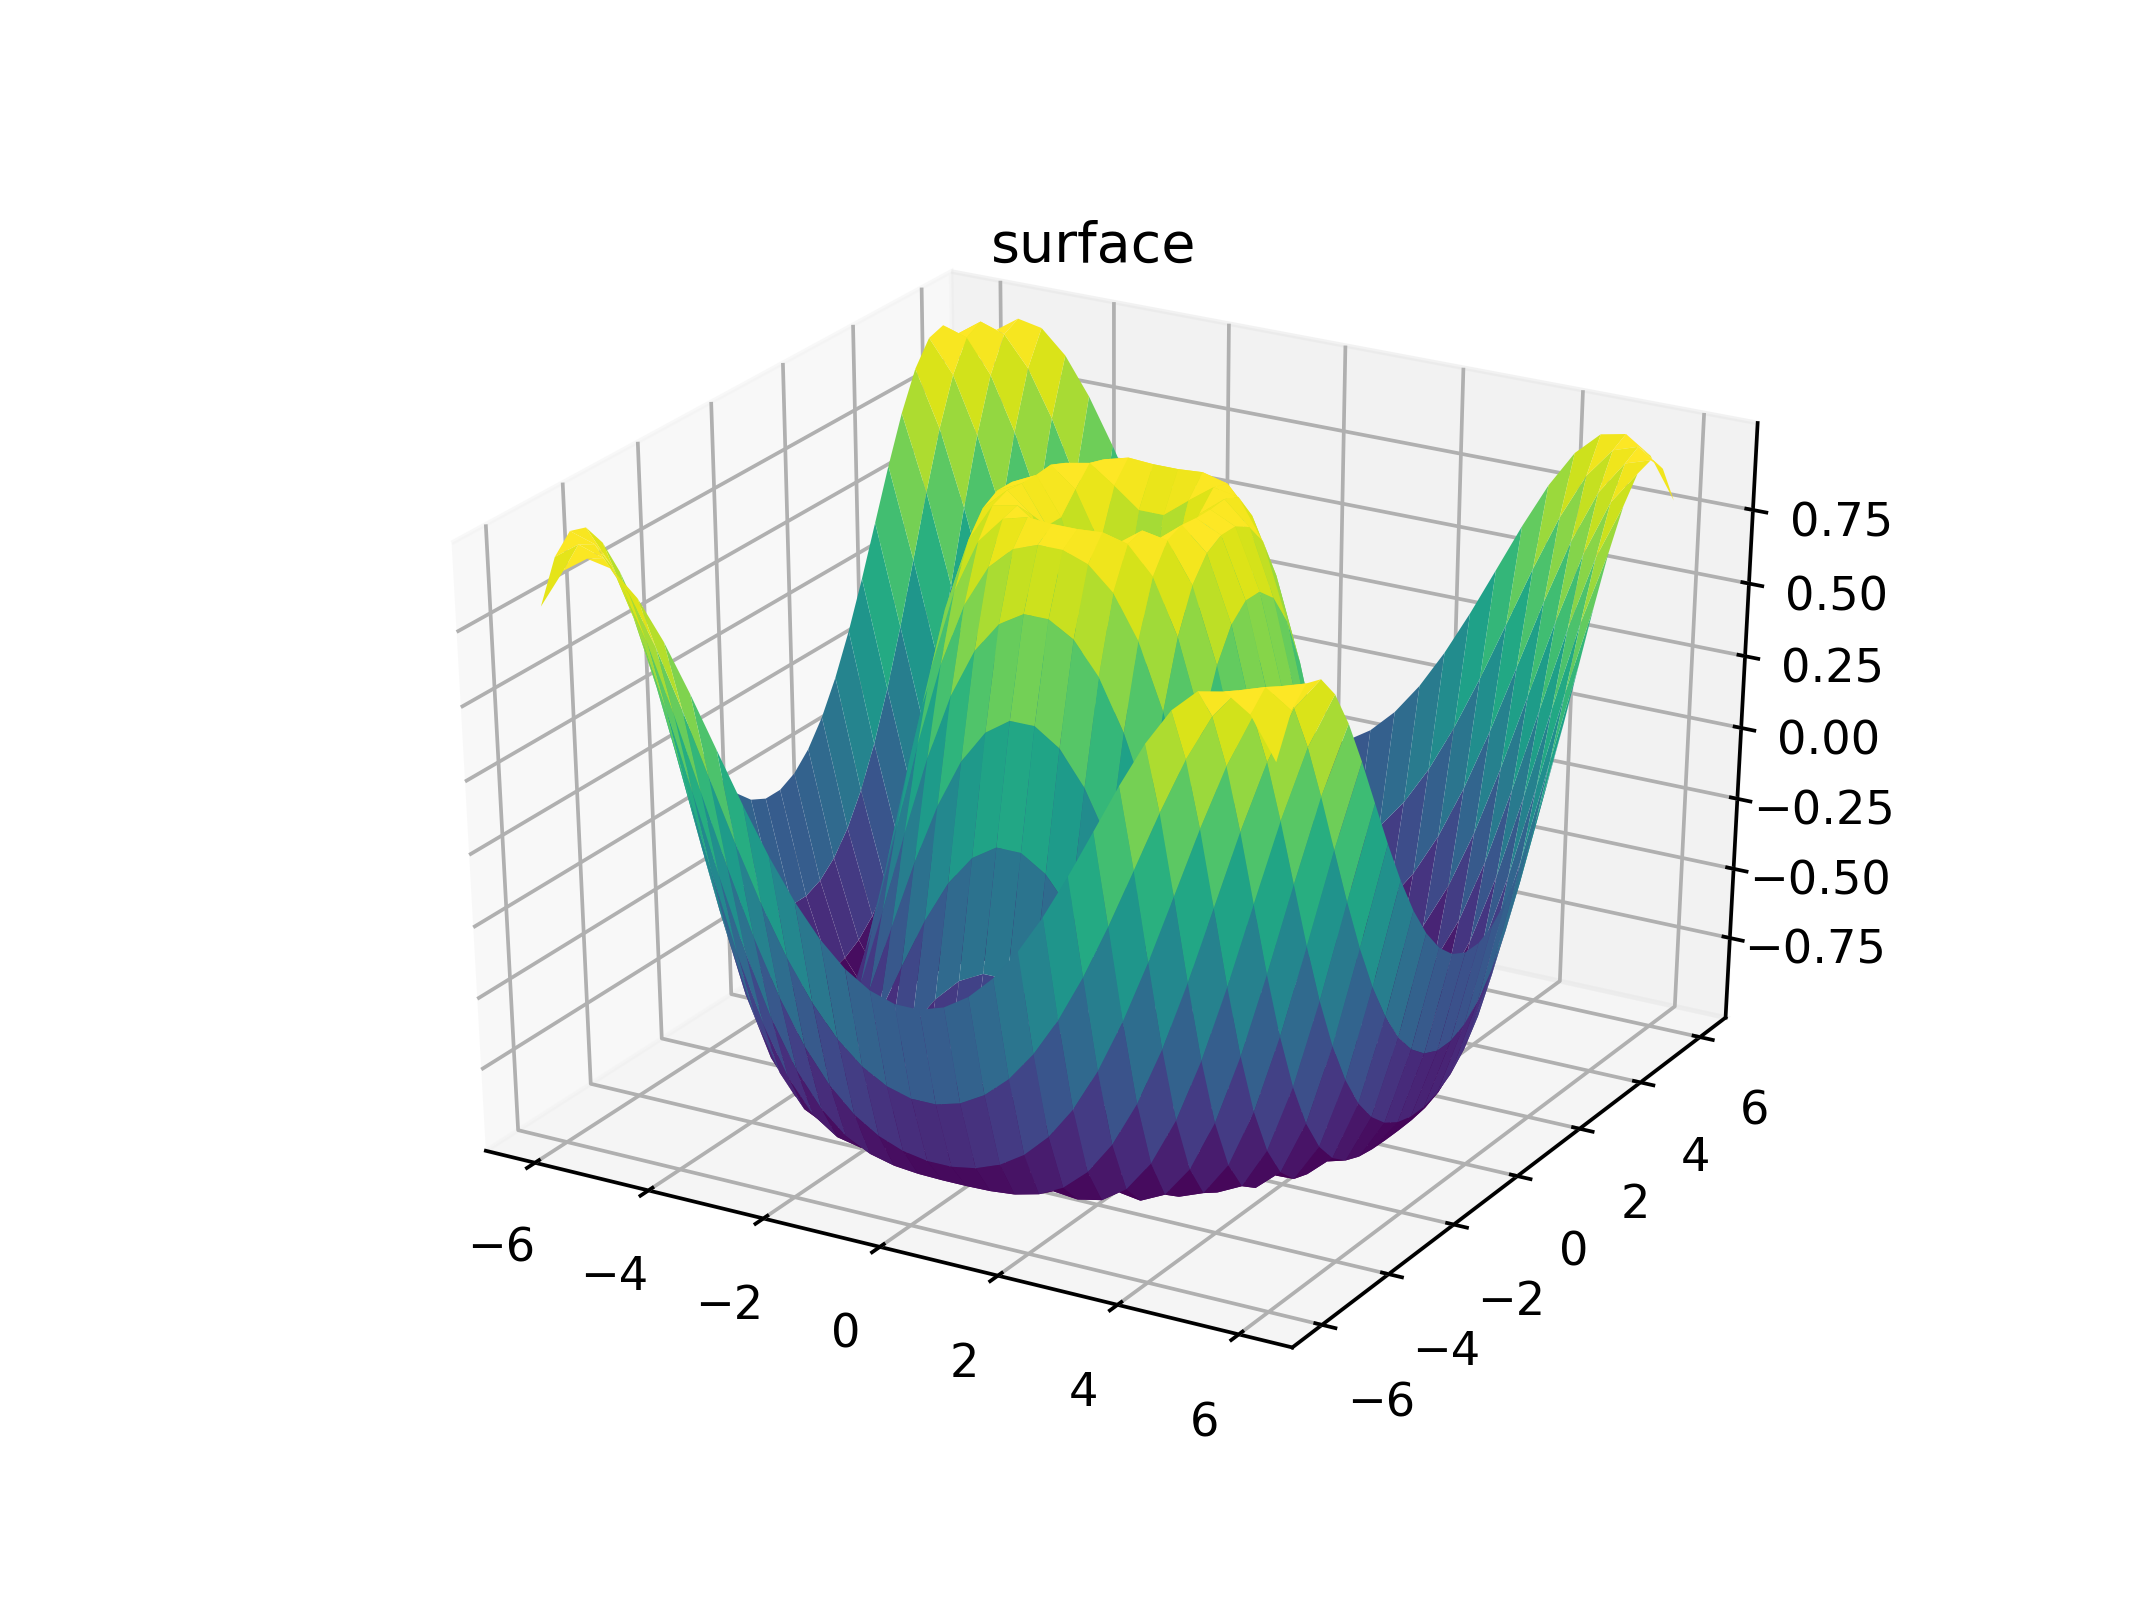

In [9]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

Note that though the grid of values for a surface plot needs to be two-dimensional, it need not be rectilinear.
Here is an example of creating a partial polar grid, which when used with the ``surface3D`` plot can give us a slice into the function we're visualizing:

<IPython.core.display.Javascript object>


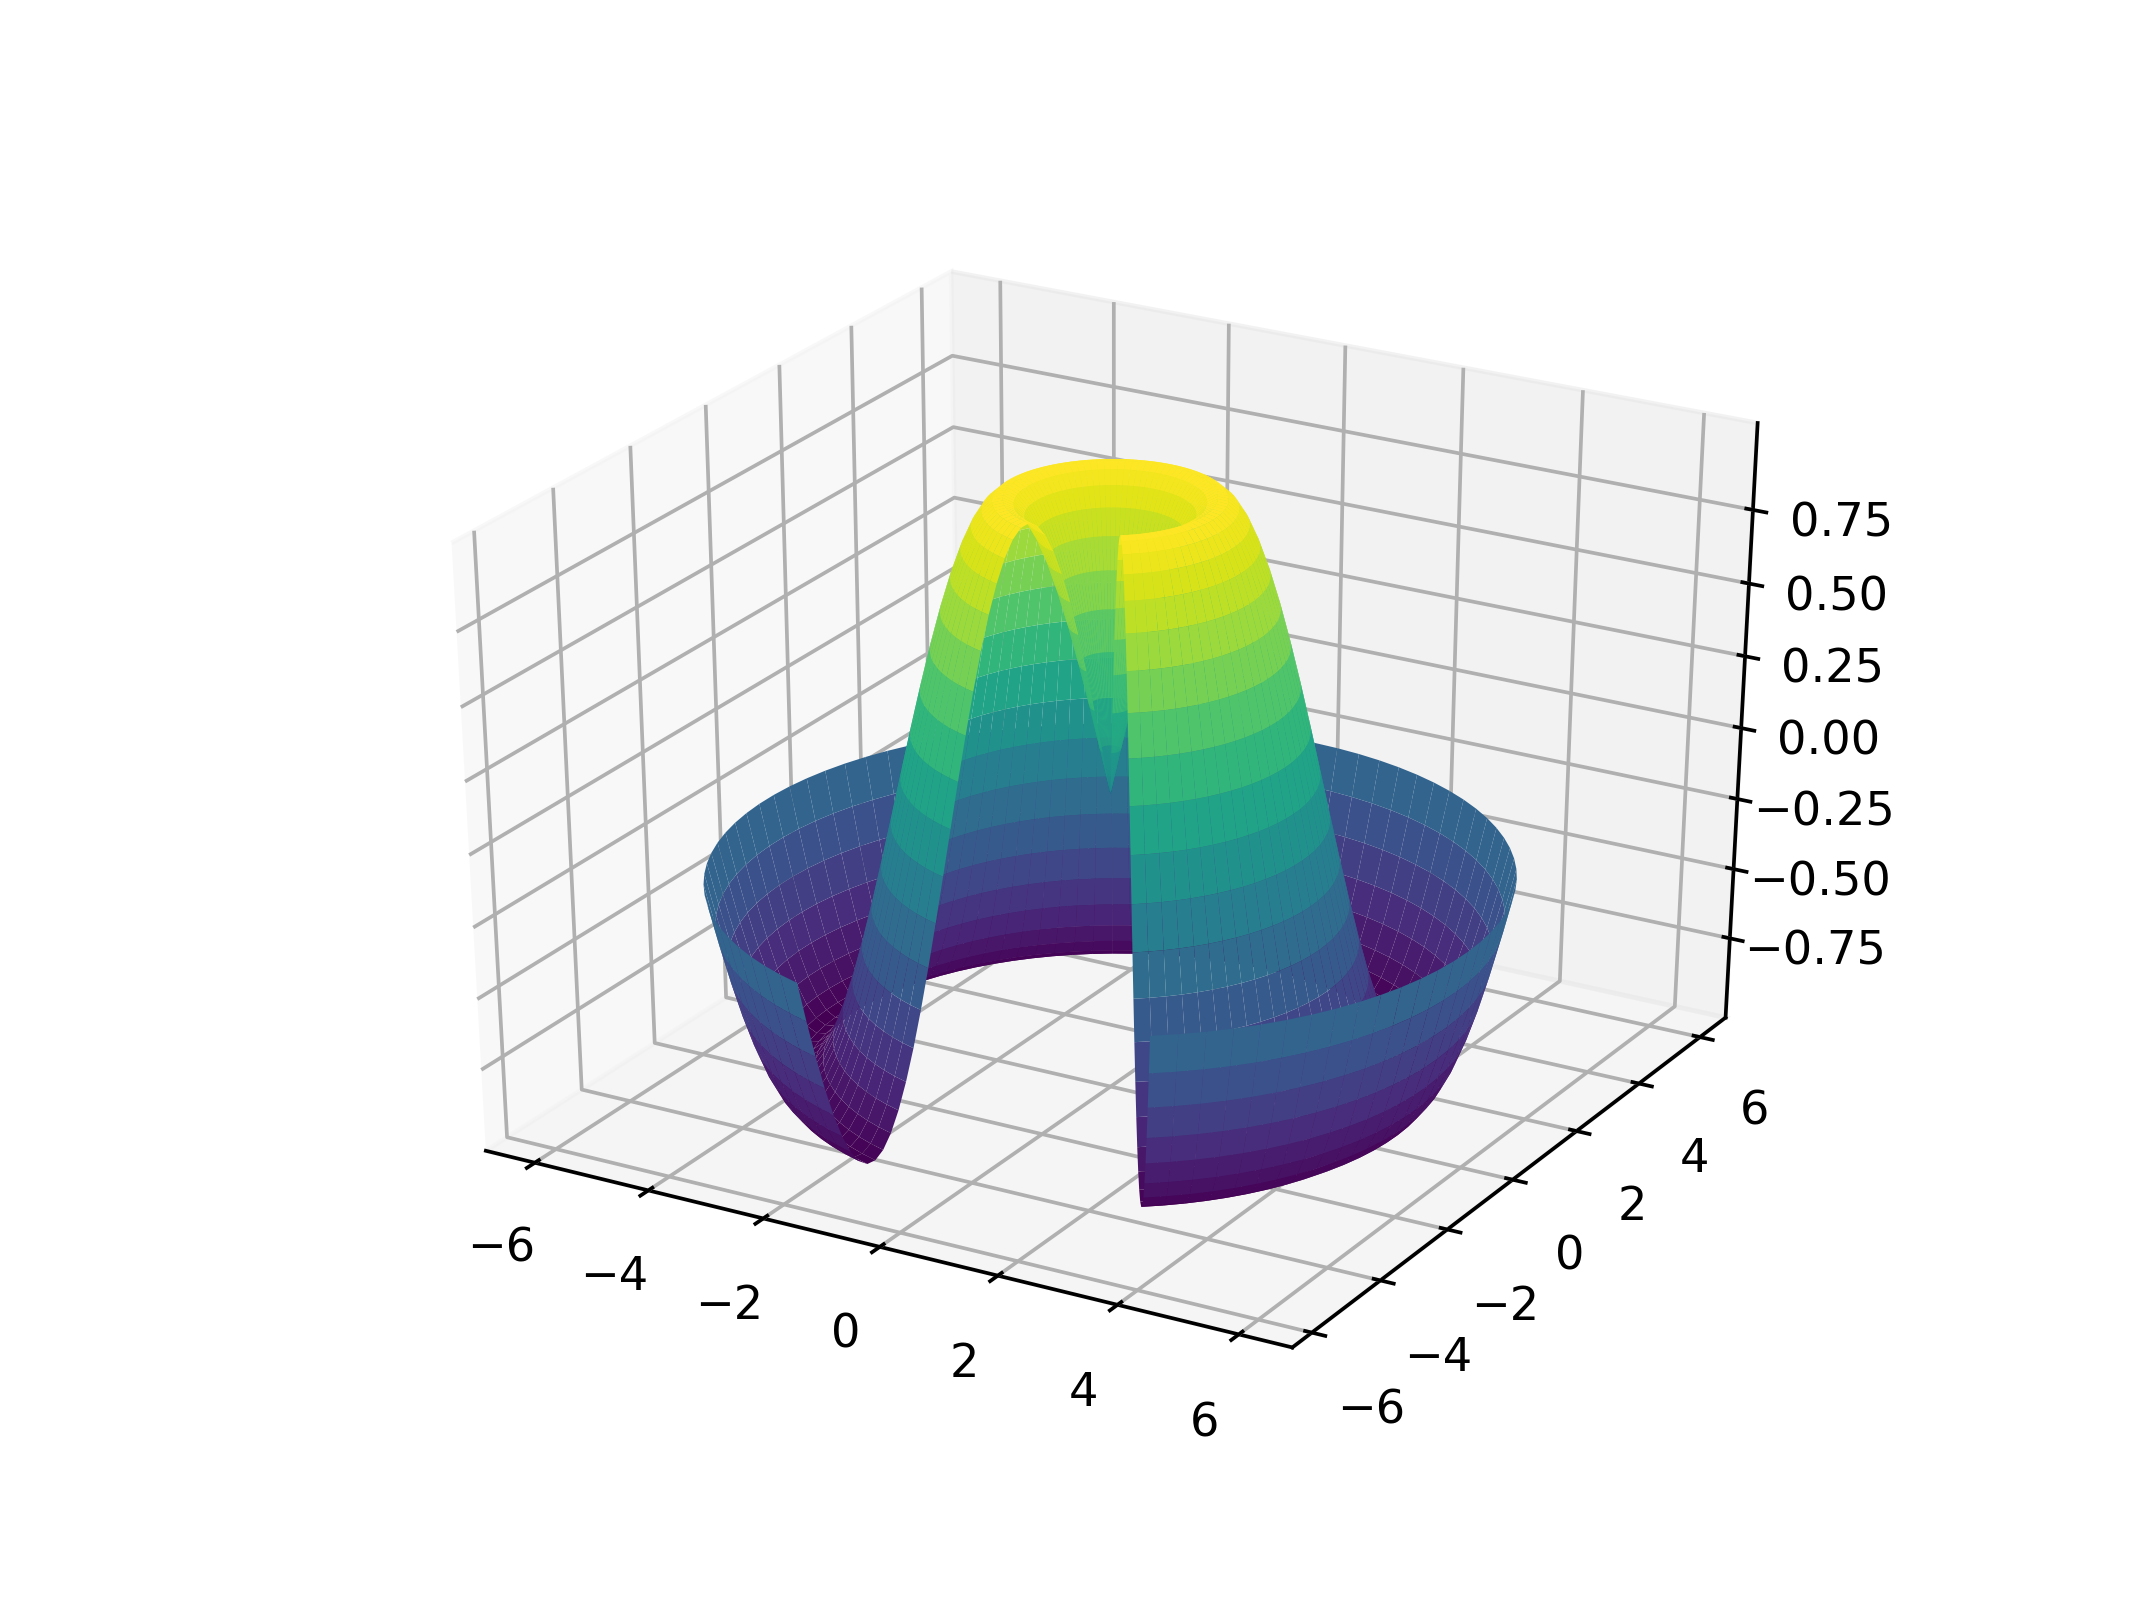

In [12]:
r = np.linspace(0, 6, 40)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 80)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

## Surface Triangulations

What if we have a set of random draws?

In [11]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

We could create a scatter plot of the points to get an idea of the surface we're sampling from:

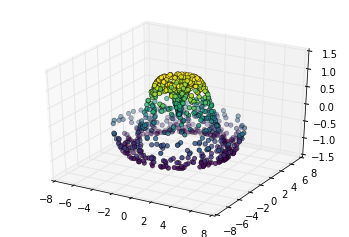

In [12]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

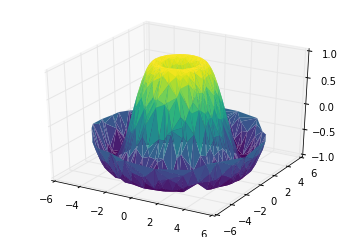

In [13]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');

### Example: Visualizing a Möbius strip

A two-dimensional strip: $\theta$, which ranges from $0$ to $2\pi$ around the loop, and $w$ which ranges from -1 to 1 across the width

In [13]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

The strip makes half a twist during a full loop, or $\Delta\phi = \Delta\theta/2$.

In [14]:
phi = 0.5 * theta

In [15]:
# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

Finally, to plot the object, we must make sure the triangulation is correct. The best way to do this is to define the triangulation *within the underlying parametrization*, and then let Matplotlib project this triangulation into the three-dimensional space of the Möbius strip.
This can be accomplished as follows:

<IPython.core.display.Javascript object>


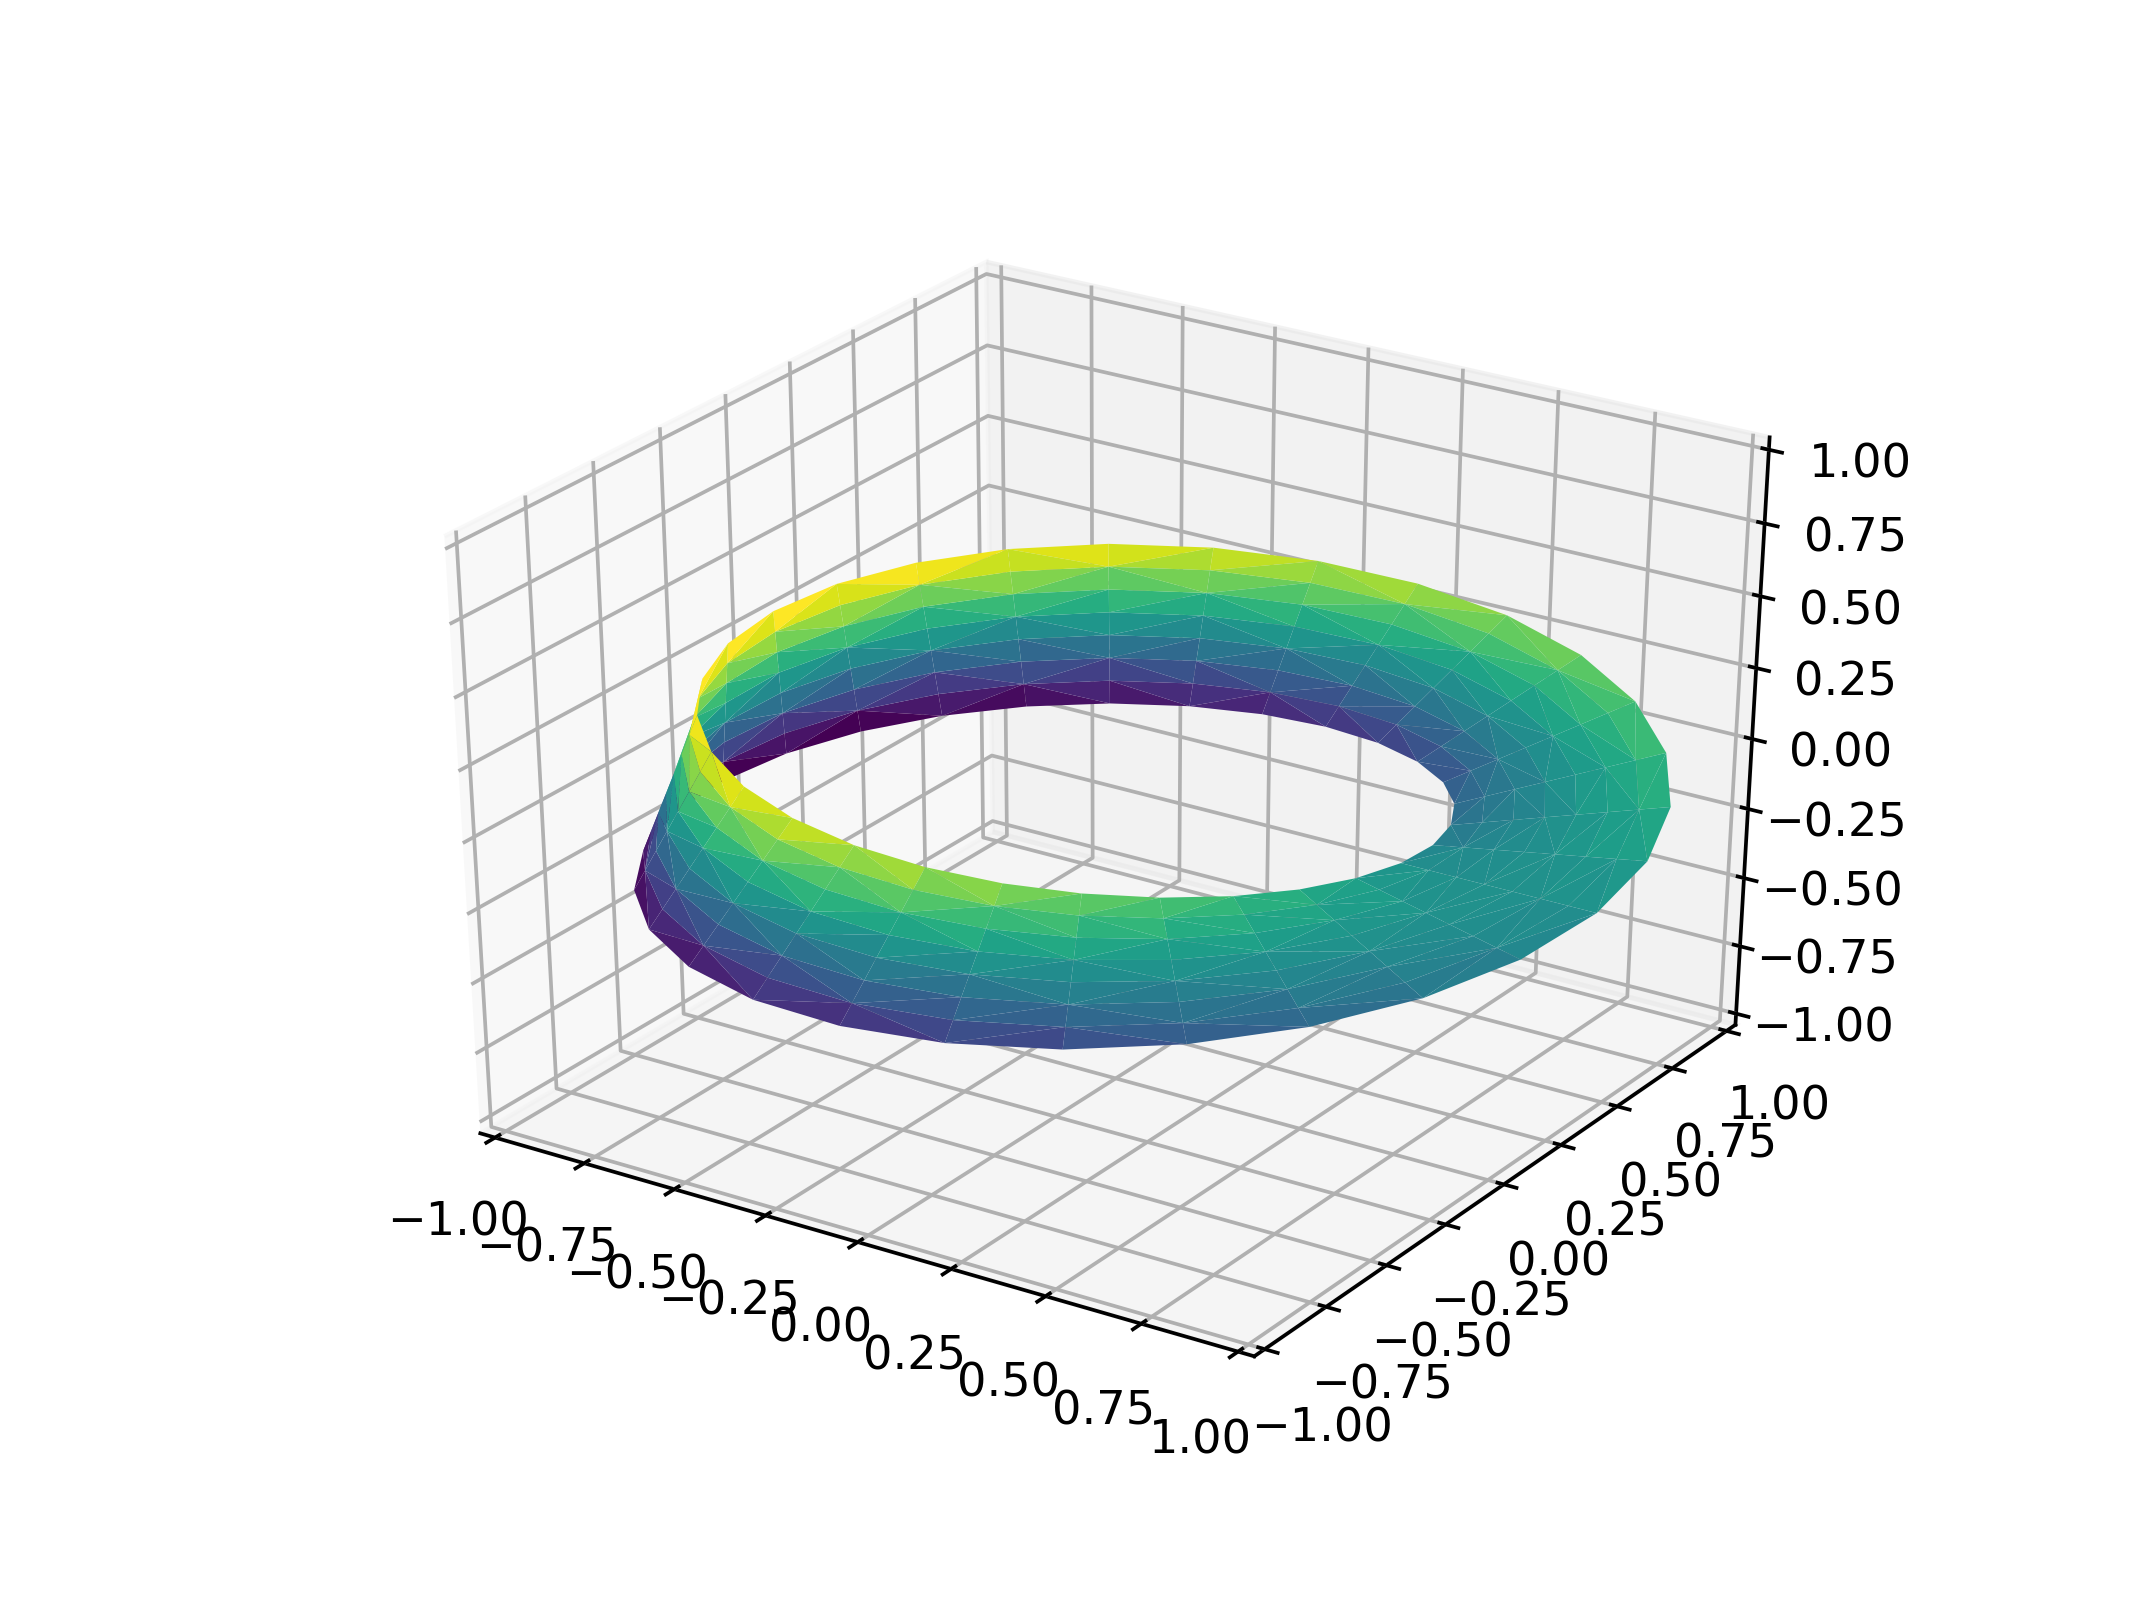

In [16]:
# triangulate in the underlying parametrization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);

<!--NAVIGATION-->
< [Customizing Matplotlib: Configurations and Stylesheets](04.11-Settings-and-Stylesheets.ipynb) | [Contents](Index.ipynb) | [Geographic Data with Basemap](04.13-Geographic-Data-With-Basemap.ipynb) >